# Topic 13 Examples

In [50]:
from os.path import exists
file_exists = exists('basic_material.py')

if (not file_exists):
    !wget -O basic_material.py https://raw.githubusercontent.com/JonHowMIT/Signals_and_Systems/main/basic_material.py
from sympy import init_printing, symbols, Function, Symbol,simplify, expand, Eq, solve, diff, integrate, exp, sin, cos, pi, I, Abs, arg, re, im, Heaviside, laplace_transform, inverse_laplace_transform, fourier_transform, inverse_fourier_transform, sqrt, Rational, S, N 

init_printing(use_unicode=True)
print("Sympy version " + sympy.__version__)

x, g, X, G, tau = symbols('x g X G tau', cls = Function)
tau = Symbol('tau', negative=True) 
t = Symbol('t', real=True) 
s = Symbol('s') 
a = Symbol('a', positive=True, real=True) 


Sympy version 1.13.2


## Define anticausal transforms

In [51]:
def laplace_transform_ac(g_lt_ac,t,s, NC = True):
    return laplace_transform(g_lt_ac.subs(tau,-t), t, -s, noconds = NC)

def inverse_laplace_transform_ac(G_ilt_ac,s,t):
    return (inverse_laplace_transform(G_ilt_ac.subs(s,-s),s,t).subs(t,-tau))*Heaviside(-tau,1)

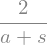

In [52]:
#See Topic 13.5 Example 1
g = 2*exp(-a*t)*Heaviside(t,0)
G = laplace_transform(g, t, s, noconds = True) # Checking the performance -  Should get 2/s+a
simplify(G)

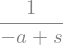

In [53]:
#See Topic 13.5 Example 2
g = exp(a*t)*Heaviside(t,0)
G = laplace_transform(g, t, s, noconds = True) # Checking the performance -  Should get 1/s-a
simplify(G)

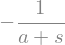

In [54]:
#See Topic 13.5 Example 3
# here tau is time t when it is negative
g_ac = exp(-a*tau)*Heaviside(-tau)
G_ac = laplace_transform_ac(g_ac,t,s, True) # Checking the performance -  Should get -1/(s+a)
simplify(G_ac)

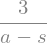

In [55]:
#See Topic 13.5 Example 4
g = 3*exp(a*tau)*Heaviside(-tau,1) # 1 here as we took it to be 0 for pos time
G = laplace_transform_ac(g, t, s, True) # Checking the performance -  Should get -3/s-a.
simplify(G)

## Anticausal - Topic 13 - Example 7 - Consider 3 cases for the ROC

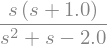

In [56]:
# System
G1 = 2/3/(s-1) # pole at s = 1
G2 = -2/3/(s+2) # pole at s = -2
N(simplify(1+G1+G2),2)

In [64]:
# ROC A -2 < Re[s] < 1 
g_rocA = inverse_laplace_transform_ac(G1,s,t) + inverse_laplace_transform(1+G2,s,t)
N(g_rocA,4)

In [65]:
# ROC B Re[s] < -2
g_rocB = inverse_laplace_transform(1,s,t) + inverse_laplace_transform_ac(G1,s,t) + inverse_laplace_transform_ac(G2,s,t)
N(g_rocB,4)

In [66]:
# ROC C Re[s] > 1
g_rocC = inverse_laplace_transform(G1,s,t) + inverse_laplace_transform(1+G2,s,t)
N(g_rocC,4)